In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ds_salaries.csv")

In [40]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Engineer,162500,USD,162500,US,0,US,M
1,2023,MI,FT,Data Engineer,130000,USD,130000,US,0,US,M
2,2023,SE,FT,NLP Engineer,69500,EUR,74579,ES,100,ES,M
3,2023,SE,FT,NLP Engineer,60000,EUR,64385,ES,100,ES,M
4,2023,SE,FT,Data Engineer,174350,USD,174350,US,100,US,M


In [41]:
# only saving the relevant features for my data-frame
df = df[["job_title", "experience_level", "employee_residence","salary_in_usd"]]
df = df.rename({"salary_in_usd": "salary"}, axis=1)

df.head()

,job_title,experience_level,employee_residence,salary
0,Data Engineer,MI,US,162500
1,Data Engineer,MI,US,130000
2,NLP Engineer,SE,ES,74579
3,NLP Engineer,SE,ES,64385
4,Data Engineer,SE,US,174350


In [42]:
# only saving the training examples where salary is not null
df = df[df["salary"].notnull()]
df.head()

,job_title,experience_level,employee_residence,salary
0,Data Engineer,MI,US,162500
1,Data Engineer,MI,US,130000
2,NLP Engineer,SE,ES,74579
3,NLP Engineer,SE,ES,64385
4,Data Engineer,SE,US,174350


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           3783 non-null   object
 1   experience_level    3783 non-null   object
 2   employee_residence  3783 non-null   object
 3   salary              3783 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 118.3+ KB


In [44]:
df = df.dropna()
df.isnull().sum()

job_title             0
experience_level      0
employee_residence    0
salary                0
dtype: int64

In [45]:
# getting the quantity of training examples there are per existing residence 
df.employee_residence.value_counts()

employee_residence
US    3028
GB     169
CA      85
ES      82
IN      70
      ... 
AM       1
CY       1
KW       1
IL       1
MT       1
Name: count, Length: 78, dtype: int64

In [46]:
# function that checks if a category of data, has sufficient data to be contained in the data set, 
# or else it will be cut off, and but into another cateogry called 'Other'
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [47]:
# creating residence_map where its value is returned from the shorten categories function
residence_map = shorten_categories(df.employee_residence.value_counts(), 70)
df['employee_residence'] = df['employee_residence'].map(residence_map)

df.employee_residence.value_counts()

employee_residence
US       3028
Other     349
GB        169
CA         85
ES         82
IN         70
Name: count, dtype: int64

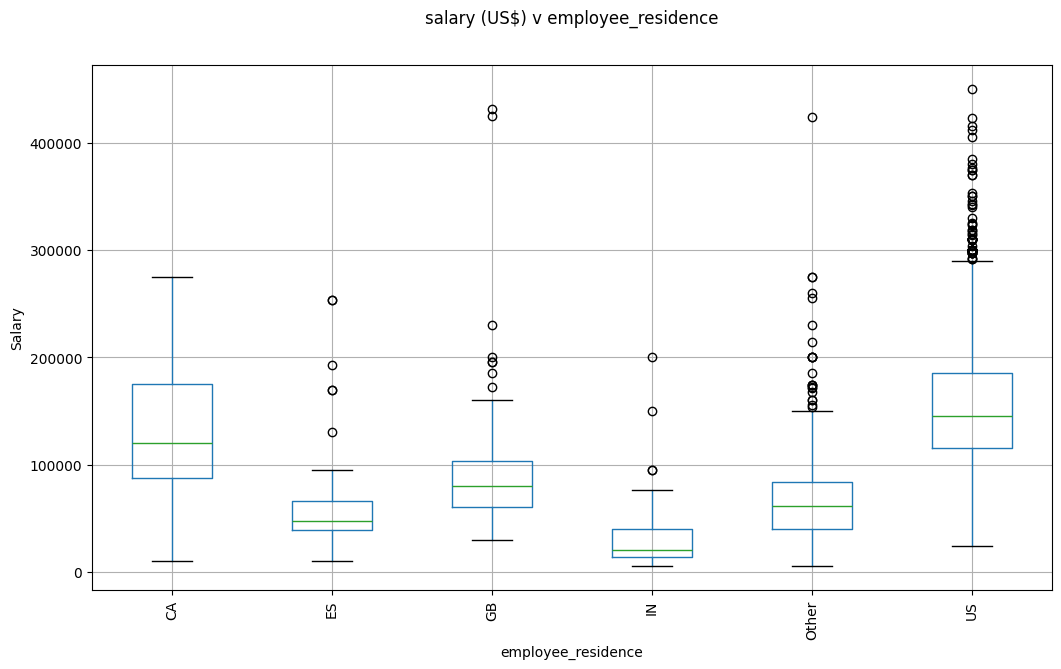

In [48]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('salary', 'employee_residence', ax=ax)
plt.suptitle('salary (US$) v employee_residence')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()
# the boxes are the median, while the bubbles are the outliers

In [49]:
df = df[df["salary"] <= 320000]
df = df[df["salary"] >= 10000]
df = df[df['employee_residence'] != 'Other']

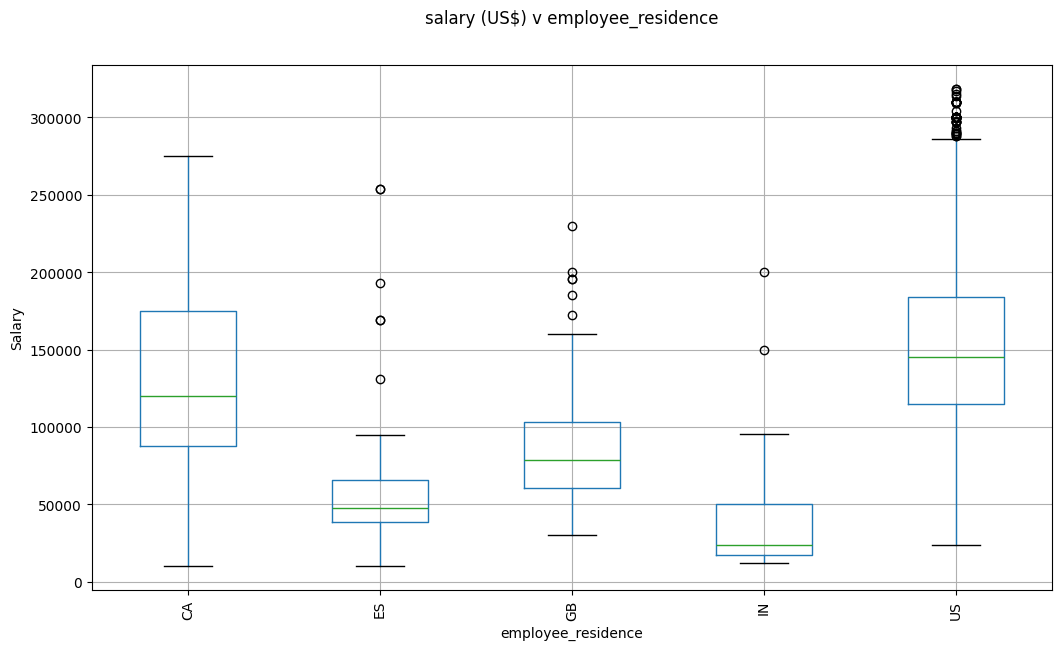

In [50]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('salary', 'employee_residence', ax=ax)
plt.suptitle('salary (US$) v employee_residence')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()
# the boxes are the median, while the bubbles are the outliers

In [51]:
# experience level data already cleaned
df["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [52]:
# # turning the education strings into numbers
from sklearn.preprocessing import LabelEncoder
exp_level = LabelEncoder()
df['experience_level'] = exp_level.fit_transform(df['experience_level'])
df["experience_level"].unique()
#le.classes_

array([2, 3, 0, 1])

In [53]:
# now doing the same to residences, turning residence locations into numbers
emp_residence = LabelEncoder()
df['employee_residence'] = emp_residence.fit_transform(df['employee_residence'])

In [54]:
# function that checks if a category of data, has sufficient data to be contained in the data set, 
# or else it will be cut off, and but into another cateogry called 'Other'
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map
df.job_title.value_counts()

job_title
Data Engineer                          998
Data Scientist                         763
Data Analyst                           582
Machine Learning Engineer              254
Analytics Engineer                     102
                                      ... 
Principal Data Architect                 1
Marketing Data Analyst                   1
Data Analytics Lead                      1
Principal Machine Learning Engineer      1
Finance Data Analyst                     1
Name: count, Length: 80, dtype: int64

In [55]:
job_map = shorten_categories(df.job_title.value_counts(), 102)
df.job_title = df.job_title.map(job_map)

In [56]:
# now doing the same to countries, turning countries into numbers
job_position = LabelEncoder()
df['job_title'] = job_position.fit_transform(df['job_title'])

In [57]:
# assigning all values that are under each category except for the category "salary" which is of course 
# the output we will train with which is assigned to array "y" while x is upperCase symbolizing a matrix
X = df.drop("salary", axis=1)
y = df["salary"]

In [58]:
# importing a model from scikit-learn library
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
# always have to fit first, research why
linear_reg.fit(X, y.values)

LinearRegression()

In [59]:
# get the prediction of y with input of matrix X
y_pred = linear_reg.predict(X)

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# mean squarred error is cost function squared 
error = np.sqrt(mean_squared_error(y, y_pred))

In [61]:
print("${:,.02f}".format(error))

$51,157.94


In [62]:
# using a new model which might fit better for this dataset
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [63]:
y_pred = dec_tree_reg.predict(X)
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$45,281.80


In [64]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [65]:
y_pred = random_forest_reg.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$45,292.13


In [66]:
# CV stands for cross validation
from sklearn.model_selection import GridSearchCV
# create array of parameters to test which fits best
max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

#loops through and chooses best parameter
regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [67]:
regresser = gs.best_estimator_
# fit values so that the model generalizes to similiar data to that on which it was trained on
regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$45,281.80


In [68]:
X

,job_title,experience_level,employee_residence
0,2,2,4
1,2,2,4
2,5,3,1
3,5,3,1
4,2,3,4
...,...,...,...
3777,5,3,4
3779,5,2,4
3780,3,0,4
3781,5,0,4


In [69]:
X = np.array([["Data Engineer", "SE", "US"]])
X

array([['Data Engineer', 'SE', 'US']], dtype='<U13')

In [70]:
df.job_title.unique()

array([2, 5, 0, 4, 3, 1])

In [71]:
#trying to ge the array indexes of the inserted input on the above code space `
#first line of code gets the first column category and second line gets the second
X[:, 0] = job_position.transform(X[:,0])
X[:, 1] = exp_level.transform(X[:,1])
# only emp_residence that does not work
X[:, 2] = emp_residence.transform(X[:,2])
X


array([['2', '3', '4']], dtype='<U13')

In [72]:
y_pred = regressor.predict(X)
y_pred

/Users/tyf/Documents/software-programming/personal-coding-projects/machine-learning/salary-prediction-app/streamlit-env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([156792.73206442])

In [73]:
# pickle is used to export the model 
import pickle

In [74]:
data = {"model": regressor, "job_position": job_position, "exp_level": exp_level, "emp_residence": emp_residence}
with open('saved_steps_ds.pkl', 'wb') as file:
    pickle.dump(data, file)

In [75]:
with open('saved_steps_ds.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
emp_residence = data["emp_residence"]
job_position = data["job_position"]
exp_level = data["exp_level"]

In [76]:
y_pred = regressor_loaded.predict(X)
y_pred

/Users/tyf/Documents/software-programming/personal-coding-projects/machine-learning/salary-prediction-app/streamlit-env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([156792.73206442])